# **RBM**

In [37]:
import numpy as np
import matplotlib.pyplot as plt

class RBM:
    def __init__(self, num_visible, num_hidden):
        self.num_visible = num_visible
        self.num_hidden = num_hidden
        self.W = np.random.randn(num_visible, num_hidden)
        self.b = np.zeros(num_hidden)
        self.a = np.zeros(num_visible)

    def sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))

    def gibbs_sampling(self, v, k):
        for _ in range(k):
            h = self.sigmoid(np.dot(v, self.W) + self.b)
            h_sample = np.random.binomial(1, h)
            v = self.sigmoid(np.dot(h_sample, self.W.T) + self.a)
            v_sample = np.random.binomial(1, v)
        return v, h

    def compute_reconstruction_error(self, data):
        reconstructed_data = self.sigmoid(np.dot(self.sigmoid(np.dot(data, self.W) + self.b), self.W.T) + self.a)
        error = np.mean(np.square(data - reconstructed_data))
        return error


    def train(self, data, learning_rate, k, epochs, batch_size):
        num_batches = len(data) // batch_size
        costs = []

        for epoch in range(epochs):
            np.random.shuffle(data)
            for batch_idx in range(num_batches):
                batch_data = data[batch_idx * batch_size : (batch_idx + 1) * batch_size]

                pos_associations_batch = np.zeros_like(self.W)
                neg_associations_batch = np.zeros_like(self.W)
                a_diff_batch = np.zeros_like(self.a)
                b_diff_batch = np.zeros_like(self.b)

                for v in batch_data:
                    v_sample = np.copy(v)
                    v_k, h_k = self.gibbs_sampling(v_sample, k)

                    pos_associations_batch += np.outer(v, self.sigmoid(np.dot(v, self.W) + self.b))
                    neg_associations_batch += np.outer(v_k, self.sigmoid(np.dot(v_k, self.W) + self.b))
                    a_diff_batch += (v - v_k)
                    b_diff_batch += (self.sigmoid(np.dot(v, self.W) + self.b) - self.sigmoid(np.dot(v_k, self.W) + self.b))

                self.W += learning_rate * (pos_associations_batch - neg_associations_batch) / batch_size
                self.a += learning_rate * a_diff_batch / batch_size
                self.b += learning_rate * b_diff_batch / batch_size

            cost = self.compute_reconstruction_error(data)
            costs.append(cost)

        return costs


In [38]:
seed = 10
np.random.seed(seed)
data = np.random.binomial(1, 0.5, size=(100, 20))
training_data = data.copy()

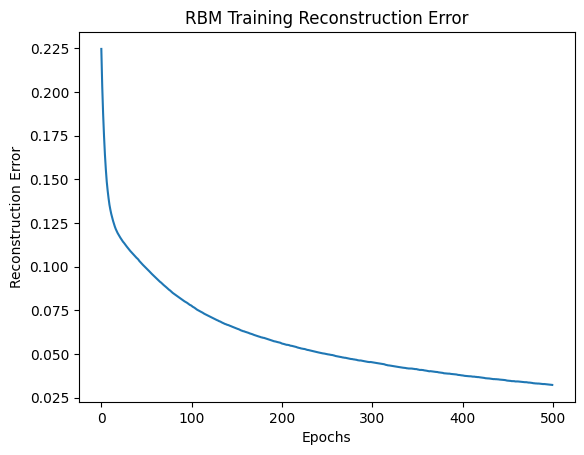

In [39]:
num_visible = data.shape[1]
num_hidden = 20
learning_rate = 0.008
k = 1
epochs = 500
batch_size = 5

rbm = RBM(num_visible, num_hidden)
costs = rbm.train(training_data, learning_rate, k, epochs, batch_size)


plt.plot(costs)
plt.xlabel('Epochs')
plt.ylabel('Reconstruction Error')
plt.title('RBM Training Reconstruction Error')
plt.show()